In [1]:
from IPython.display import Image
import numpy as np
import os
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
diabetes = pd.read_csv("dataset_diabetes/diabetic_data.csv")
print("Shape of data is " + str(diabetes.shape))

Shape of data is (101766, 50)


In [2]:
diabetes.sample(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38090,118310658,24348438,AfricanAmerican,Female,[60-70),?,1,1,1,8,MD,Cardiology,44,0,21,0,1,2,428,584,250.41,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
91657,312021536,153036734,Other,Female,[70-80),?,1,3,7,2,?,?,42,2,13,0,0,0,578,284,572,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
95908,368363996,104209110,?,Female,[50-60),?,1,1,7,4,SP,?,71,0,10,0,0,0,250.12,276,276,9,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
70054,200355402,44797797,Caucasian,Female,[40-50),?,1,1,7,2,HM,?,55,0,15,0,0,0,562,401,250,4,None,>7,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
3432,21301410,41313186,Caucasian,Female,[50-60),?,1,1,7,2,?,InternalMedicine,49,1,9,0,1,0,276,250.03,535,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
63086,175544250,60853590,?,Male,[60-70),?,2,1,1,7,BC,?,33,3,18,1,0,0,682,707,276,9,None,>8,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
47744,146578776,87944121,Caucasian,Female,[50-60),?,1,1,7,2,HM,?,25,0,6,0,0,0,410,250.6,357,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
11369,47055588,3501810,Caucasian,Male,[60-70),[75-100),6,1,17,6,?,?,47,0,16,0,0,0,V57,411,427,7,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
77571,235811226,64627236,Caucasian,Male,[80-90),?,2,6,1,6,MC,?,84,1,21,0,0,0,535,427,428,9,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
5215,27662190,11982978,Caucasian,Female,[40-50),?,2,1,1,3,?,InternalMedicine,50,3,11,0,0,0,414,710,305,6,None,>7,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


Number of missing values in different columns


<AxesSubplot: >

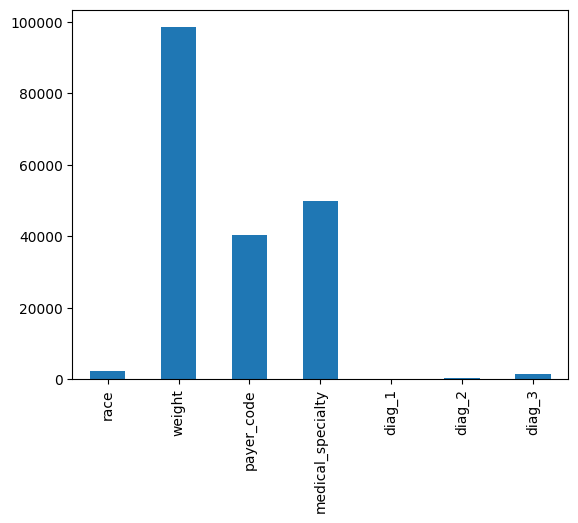

In [3]:
missing_num = np.sum(diabetes == "?",axis =0)
num_diabetes_data_entries = diabetes.shape[0]
print("Number of missing values in different columns")
missing_num[missing_num[:] > 0]
missing_num[missing_num[:] > 0].plot.bar()

<BarContainer object of 3 artists>

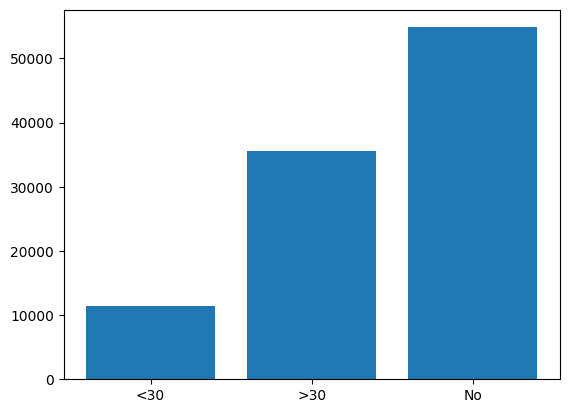

In [4]:
import matplotlib.pyplot as plt
plt.bar(['<30', '>30', 'No'],[np.sum(diabetes['readmitted'] == "<30"),
np.sum(diabetes['readmitted'] == ">30"),
np.sum(diabetes['readmitted'] == "NO")])

In [5]:
#diabetes=diabetes.drop(columns=['weight', 'payer_code','medical_specialty'])

In [6]:
# imputer for filling missing values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = '?', fill_value = np.nan, strategy = 'constant')

In [7]:
# replace ? with NaN
diabetes.replace('?', np.NaN, inplace=True)

In [8]:
diabetes=diabetes.drop(columns=['weight', 'payer_code','medical_specialty'])

In [9]:
# drop rows with missing values
diabetes.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'], inplace=True)

In [10]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [11]:
# convert string to categorical
diabetes_string_col=['race', 'gender', 'age','max_glu_serum', 
                     'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'diag_1', 'diag_2', 'diag_3',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [12]:
for i in diabetes_string_col:
    diabetes[i]= diabetes[i].astype('category')

In [13]:
diabetes['race']

1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
5               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 98053, dtype: category
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

In [14]:
y = diabetes['readmitted'] 

In [15]:
diabetes
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
diabetes = pd.DataFrame(diabetes)


for i in diabetes_string_col:
    dummies = pd.get_dummies(diabetes[i], prefix=i)
    diabetes = diabetes.join(dummies)
#     enc_df = (enc.fit_transform(diabetes[i].reshape(diabetes[i].shape[0], 1)).toarray())
#     print(enc_df)
for i in diabetes_string_col:
    diabetes = diabetes.drop(i, axis=1)
    
diabetes


encounter_id  patient_nbr  admission_type_id  \
1             149190     55629189                  1   
2              64410     86047875                  1   
3             500364     82442376                  1   
4              16680     42519267                  1   
5              35754     82637451                  2   
...              ...          ...                ...   
101761     443847548    100162476                  1   
101762     443847782     74694222                  1   
101763     443854148     41088789                  1   
101764     443857166     31693671                  2   
101765     443867222    175429310                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
1                              1                    7                 3   
2                              1                    7                 2   
3                              1                    7                 2   
4                              1                    7                 1   
5                              1                    2                 3   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  num_medications  \
1                       59               0               18   
2                       11               5               13   
3                       44               1               16   
4                       51               0                8   
5                       31               6               16   
...                    ...             ...              ...   
101761                  51               0               16   
101762                  33               3               18   
101763                  53               0                9   
101764                  45               2               21   
101765                  13               3                3   

        number_outpatient  number_emergency  number_inpatient  \
1                       0                 0                 0   
2                       2                 0                 1   
3                       0                 0                 0   
4                       0                 0                 0   
5                       0                 0                 0   
...                   ...               ...               ...   
101761                  0                 0                 0   
101762                  0                 0                 1   
101763                  1                 0                 0   
101764                  0                 0                 1   
101765                  0                 0                 0   

        number_diagnoses readmitted  race_AfricanAmerican  race_Asian  \
1                      9        >30                     0           0   
2                      6         NO                     1           0   
3                      7         NO                     0           0   
4                      5         NO                     0           0   
5                      9        >30                     0           0   
...                  ...        ...                   ...         ...   
101761                 9        >30                     1           0   
101762                 9         NO                     1           0   
101763                13         NO                     0           0   
101764                 9         NO                     0           0   
101765                 9         NO                     0           0   

        race_Caucas

In [16]:
y=diabetes['readmitted']
x=diabetes.drop(columns=['readmitted','encounter_id','patient_nbr']) # drop the patiant id
import pandas as pd

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
X_train.shape

(78442, 2350)

In [19]:
X_test.shape

(19611, 2350)

## Random Forest

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
test_accuracy = []
training_accuracy = []


clfs = []
depths = [1, 5, 100, 250, 300]
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    training_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
import matplotlib.pyplot as plt


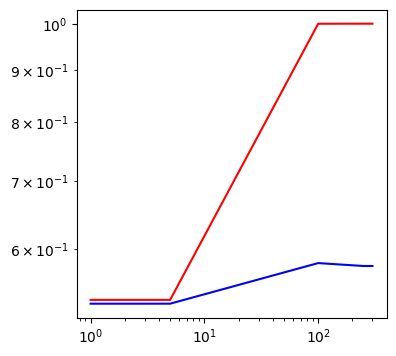

In [58]:
plt.loglog(depths, test_accuracy, c='b')
plt.loglog(depths, training_accuracy, c='r')

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Most Important Features according to Random Forest')

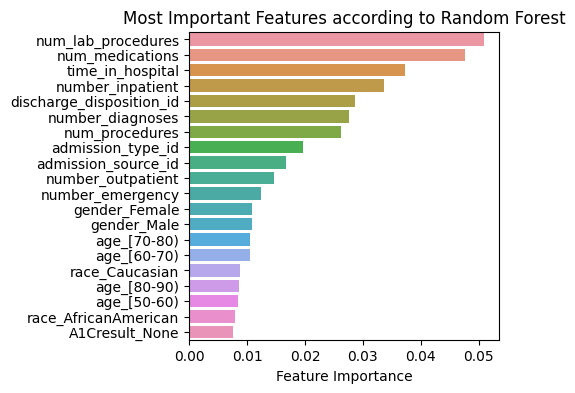

In [57]:
%pip install seaborn
import seaborn as sns
feature_imp = pd.Series(clfs[3].feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:20], y=feature_imp[:20].index)
plt.rcParams["figure.figsize"] = (4,4)
plt.xlabel('Feature Importance')
plt.title('Most Important Features according to Random Forest')